In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/california-wildfire-damage/California Wildfire Damage.csv')

In [3]:
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [5]:
df.shape

(100, 11)

In [6]:
df.isna().sum()

Incident_ID                             0
Date                                    0
Location                                0
Area_Burned (Acres)                     0
Homes_Destroyed                         0
Businesses_Destroyed                    0
Vehicles_Damaged                        0
Injuries                                0
Fatalities                              0
Estimated_Financial_Loss (Million $)    0
Cause                                   0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [9]:
df.rename(columns={'Area_Burned (Acres)':'Acres_Burned'}, inplace = True)
df.rename(columns={'Estimated_Financial_Loss (Million $)':'Estimated_loss'}, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Incident_ID           100 non-null    object        
 1   Date                  100 non-null    datetime64[ns]
 2   Location              100 non-null    object        
 3   Acres_Burned          100 non-null    int64         
 4   Homes_Destroyed       100 non-null    int64         
 5   Businesses_Destroyed  100 non-null    int64         
 6   Vehicles_Damaged      100 non-null    int64         
 7   Injuries              100 non-null    int64         
 8   Fatalities            100 non-null    int64         
 9   Estimated_loss        100 non-null    float64       
 10  Cause                 100 non-null    object        
 11  Year                  100 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(6), object(3)
memory usage: 9

In [11]:
df.Location.unique()

array(['Sonoma County', 'Shasta County', 'Butte County',
       'San Diego County', 'Napa Valley', 'Riverside County',
       'Santa Barbara County', 'Los Angeles County', 'Mendocino County',
       'Orange County'], dtype=object)

In [12]:
df.Cause.unique()

array(['Lightning', 'Human Activity', 'Unknown'], dtype=object)

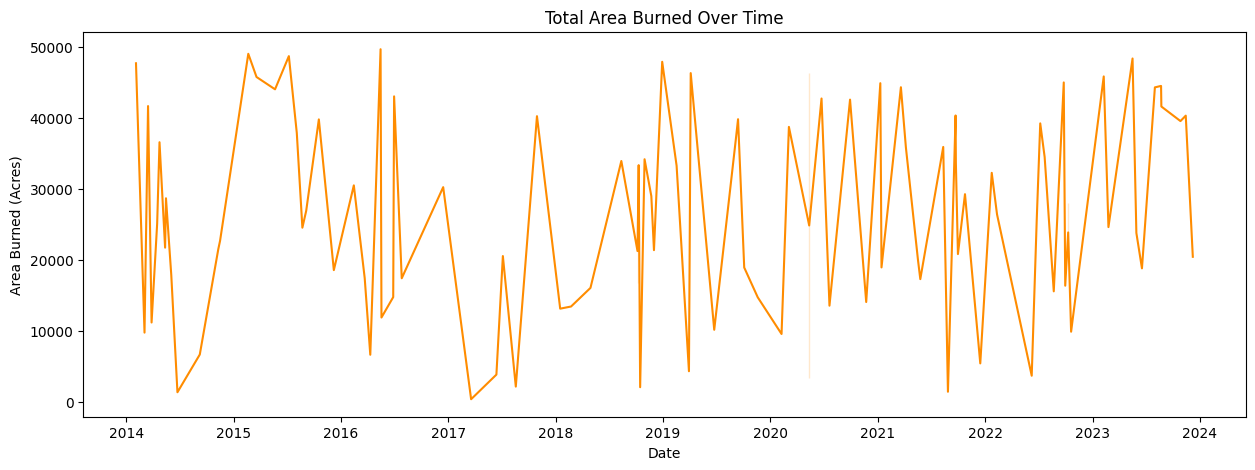

In [13]:
# Total acres_burned over the time

plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Date', y='Acres_Burned', color = 'darkorange')
plt.title("Total Area Burned Over Time")
plt.xlabel("Date")
plt.ylabel("Area Burned (Acres)")
plt.show()

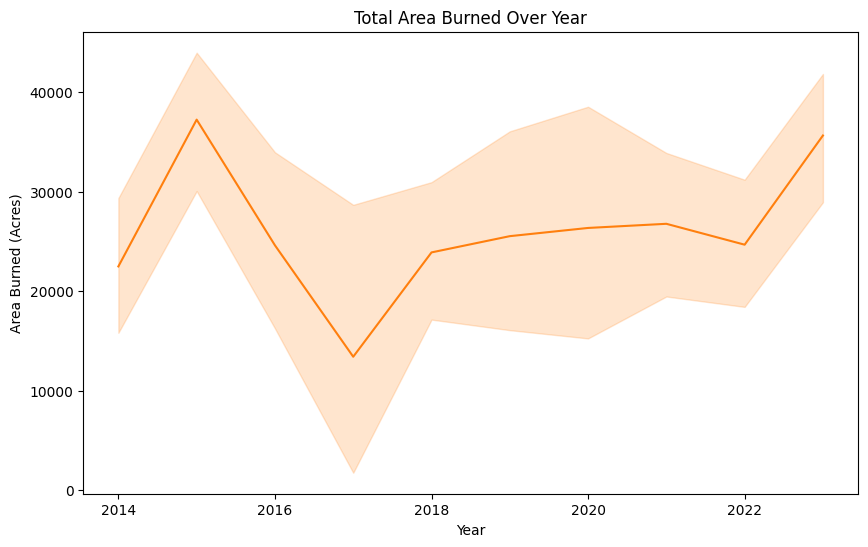

In [14]:
# Total acres_burned over the year
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Acres_Burned', color='#ff7f0e')
plt.title("Total Area Burned Over Year")
plt.xlabel("Year")
plt.ylabel("Area Burned (Acres)")
plt.show()

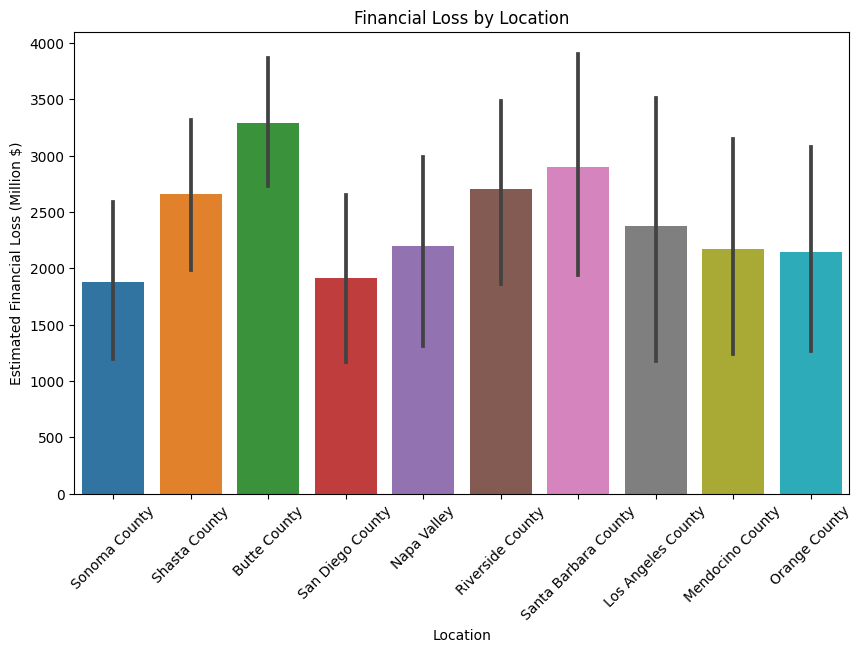

In [15]:
# Total financial loss per location
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Location", y="Estimated_loss")
plt.title("Financial Loss by Location")
plt.xlabel("Location")
plt.ylabel("Estimated Financial Loss (Million $)")
plt.xticks(rotation=45)
plt.show()

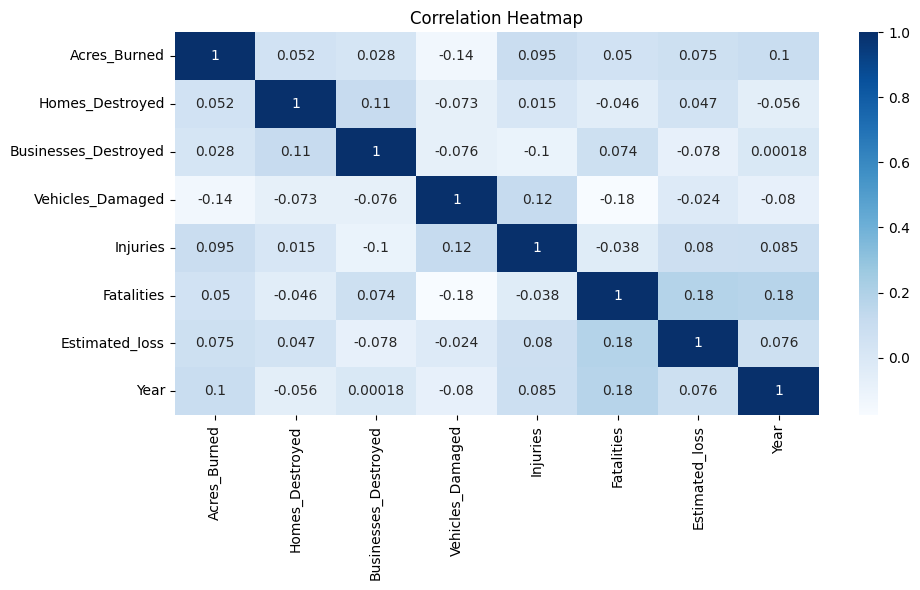

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

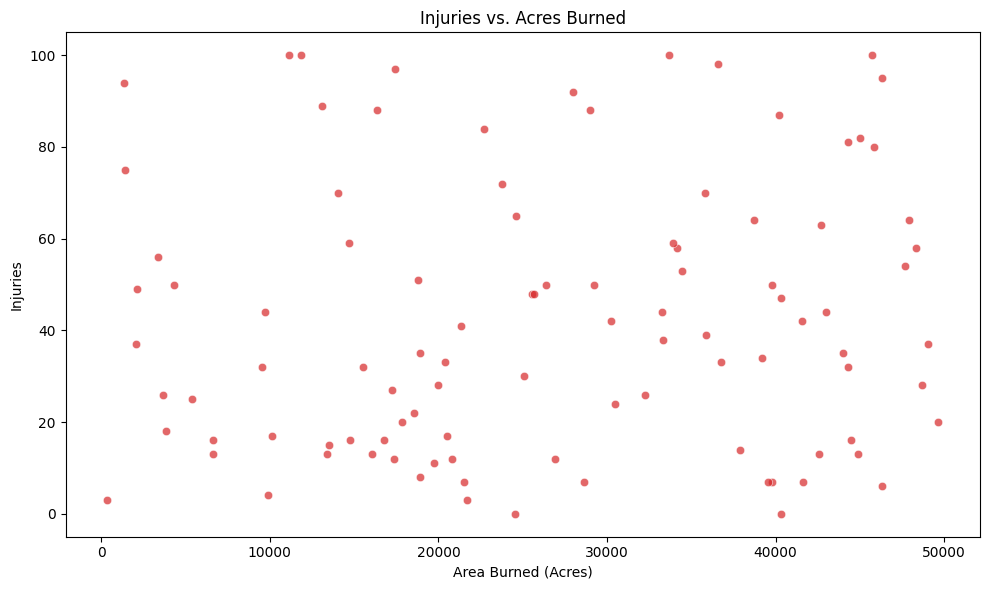

In [17]:
# Injuries vs. area burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Acres_Burned", y="Injuries", color = '#d62728', alpha=0.7)
plt.title("Injuries vs. Acres Burned")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Injuries")
plt.tight_layout()
plt.show()

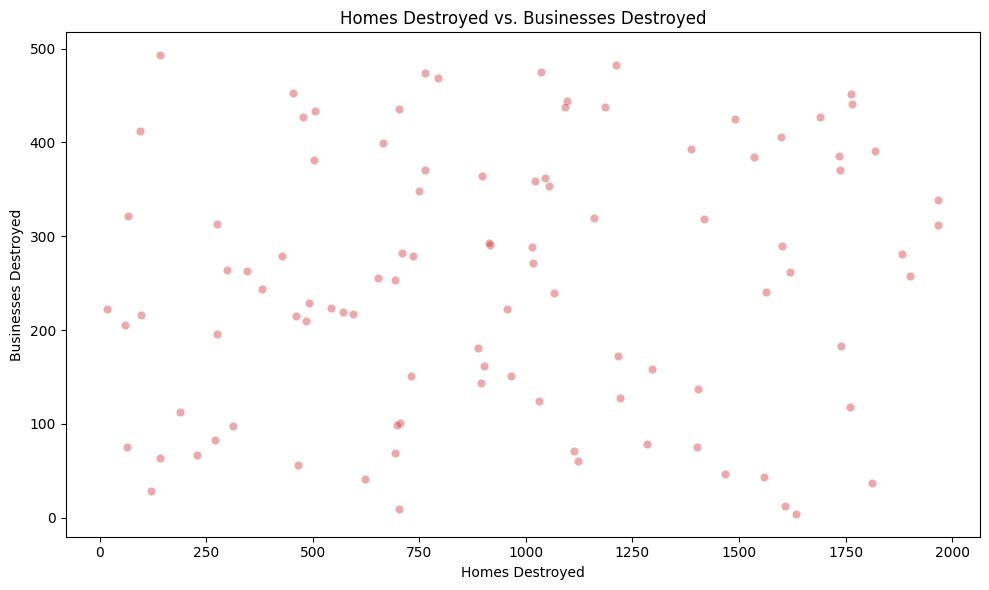

In [18]:
# Homes destroyed vs. businesses destroyed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Homes_Destroyed", y="Businesses_Destroyed", color = '#d62728',alpha=0.4)
plt.title("Homes Destroyed vs. Businesses Destroyed")
plt.xlabel("Homes Destroyed")
plt.ylabel("Businesses Destroyed")
plt.tight_layout()
plt.show()

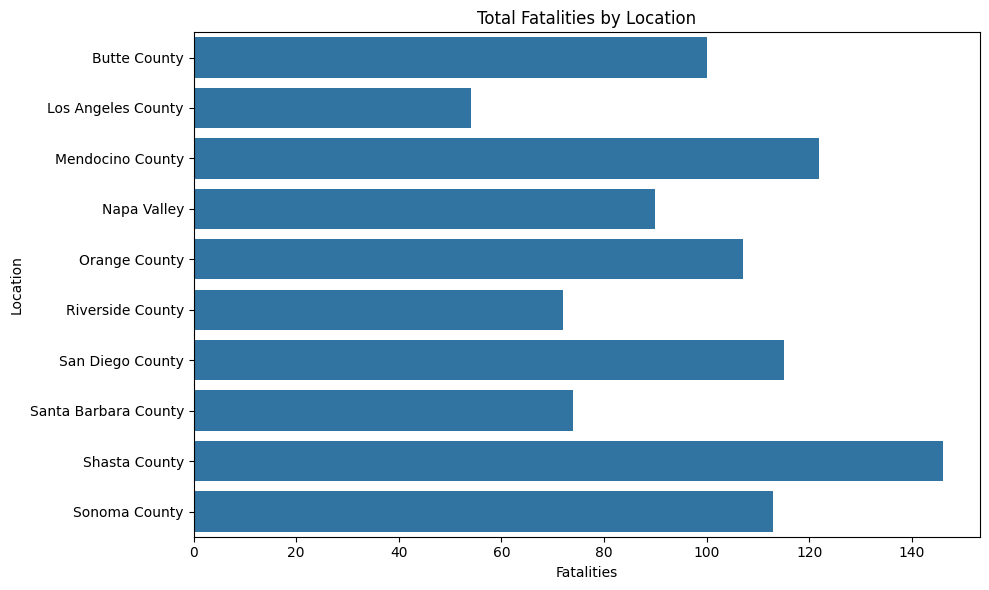

In [19]:
# Fatalities by location
df_fatalities = df.groupby("Location")["Fatalities"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_fatalities, x="Fatalities", y="Location", color = '#1f77b4')
plt.title("Total Fatalities by Location")
plt.xlabel("Fatalities")
plt.tight_layout()
plt.show()